### Regression Analysis

In [2]:
# Warning for handling warning messages
import warnings
warnings.filterwarnings(action='ignore')
# https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

In [3]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Stats modules
import statsmodels.api as sm
import scipy.stats as stats

# Auxiliar libraries
from sklearn.metrics import r2_score

## a) Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it

In [5]:
# Defining the col_names
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' , 'LSTAT' , 'MEDV']

# Read the CSV file with new column names
data = pd.read_csv('housing.csv', header=0, delim_whitespace=True, names=col_names)

# Print the first few rows of the data frame
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


[Text(0.5, 0, 'RM'), Text(0, 0.5, 'MEDV')]

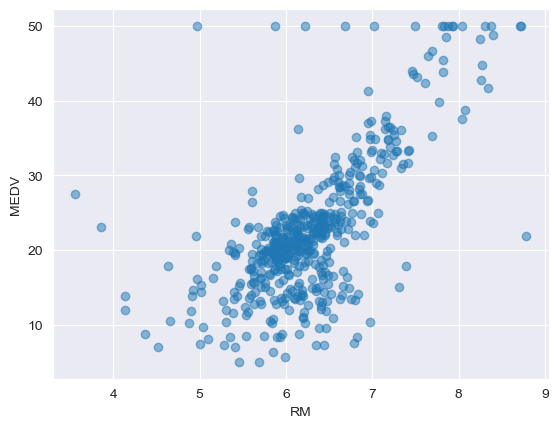

In [7]:
# Extract the required columns
x = data['RM']
y = data['MEDV']

# Plot the scatter plot
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='RM', ylabel='MEDV')

I did a machine learning course once and there was something about this dataset. The guy there noticed that there are places with high number of rooms and low price - so these are probably some areas with dormitories. The MEDV variable was casted so that prices >USD50k are USD50k. We can use it later in the analysis.

## b) Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized residuals from this regression. Does the normal probability plot indicate acceptable normality, or is there any skewness? If a skewness, what is the type of it?


In [11]:
def linear_regression(
        x,
        y,
        xlabel,
        ylabel,
        title,
):
    # calculate the coefficients of the linear regression using numpy's polyfit function
    beta = np.polyfit(x, y, deg=1)

    # make predictions using the linear regression
    predictions = x * beta[0] + beta[1]

    # create a scatter plot of the data and overlay a line plot of the linear regression
    ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
    ax.set(
        xlabel=xlabel, 
        ylabel=ylabel,
        title=title
    )
    plt.plot(x, predictions, color='red')

    # show the plot
    plt.show()
    print(f"Beta: {beta}")
    
    return predictions

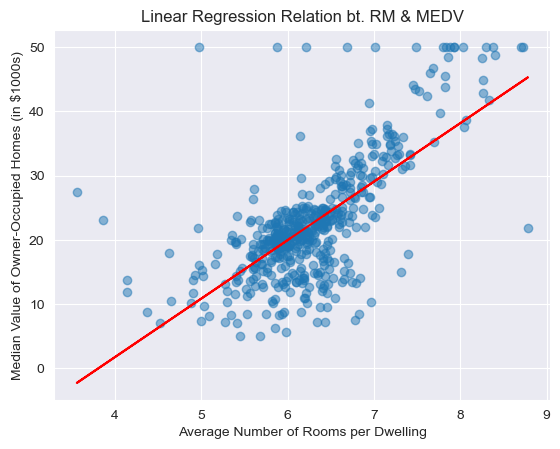

Beta: [  9.10348156 -34.67691791]


In [16]:
predictions = linear_regression(
       x,
       y,
       'Average Number of Rooms per Dwelling', 
       'Median Value of Owner-Occupied Homes (in $1000s)', 
       'Linear Regression Relation bt. RM & MEDV',
)

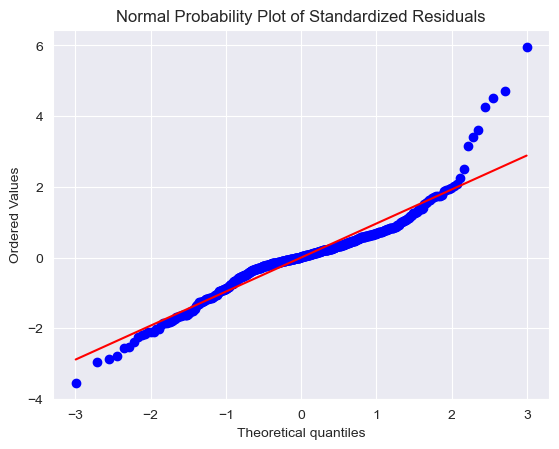

In [17]:
def plot_stand_residuals(y, predictions):
    # calculate the standardized residuals from the linear regression
    residuals = y - predictions
    standardized_residuals = stats.zscore(residuals)

    # create a normal probability plot of the standardized residuals
    stats.probplot(standardized_residuals, plot=plt)
    plt.title('Normal Probability Plot of Standardized Residuals')

    # show the plot
    plt.show()

plot_stand_residuals(y, predictions)


## ADD COMMENT HERE

## Take the natural log of both of the variables and perform a linear regression on the transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?

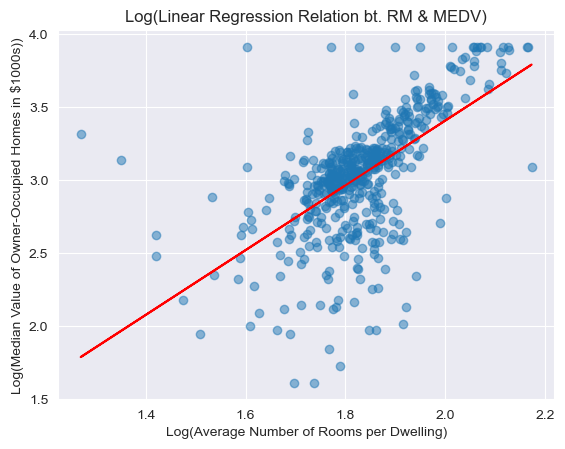

Beta: [ 2.22117783 -1.0344411 ]


In [18]:
x_log = np.log(x)
y_log = np.log(y)

predictions = linear_regression(
        x_log,
        y_log,
        'Log(Average Number of Rooms per Dwelling)',
        'Log(Median Value of Owner-Occupied Homes in $1000s))',
        'Log(Linear Regression Relation bt. RM & MEDV)',
)

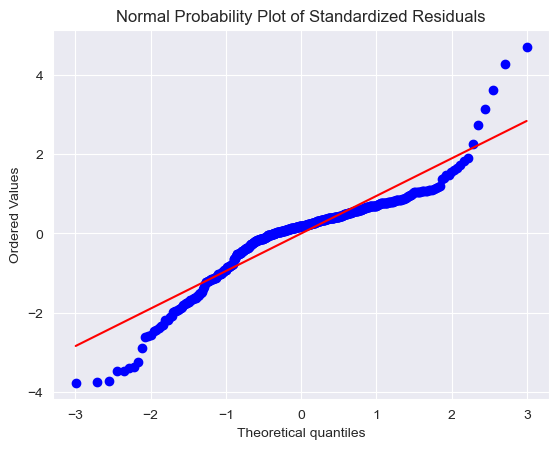

In [19]:
plot_stand_residuals(y_log, predictions)